In [8]:
import time 
from bs4 import BeautifulSoup
import requests
import pandas as pd
import random
import datetime
import csv
import pandas as pd


In [7]:
url = 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/4.5_week.csv'

quake_list = pd.read_csv(url)

quake_list['time'] = pd.to_datetime(quake_list['time']).dt.round('S')
quake_list

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-02-07 23:13:01+00:00,35.9449,35.9074,10.000,4.5,mb,57.0,129.0,1.612,0.92,...,2023-02-07T23:53:51.950Z,"14 km WNW of Yayladağı, Turkey",earthquake,7.17,1.913,0.077,49.0,reviewed,us,us
1,2023-02-07 23:12:54+00:00,-24.2776,-67.1150,186.892,4.7,mwr,83.0,41.0,1.641,1.15,...,2023-02-07T23:33:15.040Z,"81 km W of San Antonio de los Cobres, Argentina",earthquake,8.02,6.420,NaN,NaN,reviewed,us,guc
2,2023-02-07 21:31:37+00:00,7.2015,-76.9568,24.202,4.9,mb,61.0,101.0,1.738,1.01,...,2023-02-07T22:17:24.607Z,"28 km NNW of Murindó, Colombia",earthquake,4.52,6.015,0.051,119.0,reviewed,us,us
3,2023-02-07 21:30:17+00:00,-10.6686,164.9597,51.631,5.4,mww,71.0,86.0,5.085,0.95,...,2023-02-07T23:34:06.319Z,"91 km W of Lata, Solomon Islands",earthquake,9.24,6.907,0.078,16.0,reviewed,us,us
4,2023-02-07 21:21:27+00:00,37.8863,37.4652,10.000,4.9,mb,77.0,55.0,0.742,0.91,...,2023-02-07T21:38:48.040Z,Central Turkey,earthquake,4.25,1.847,0.060,89.0,reviewed,us,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,2023-02-01 10:53:21+00:00,40.1409,22.8066,13.221,4.6,mb,41.0,61.0,1.176,0.83,...,2023-02-07T12:00:04.247Z,"22 km SE of Paralía, Greece",earthquake,4.72,4.645,0.223,6.0,reviewed,us,us
171,2023-02-01 10:52:28+00:00,-9.8317,-78.6021,60.651,4.6,mb,41.0,171.0,2.753,0.97,...,2023-02-01T11:08:24.040Z,near the coast of northern Peru,earthquake,12.46,10.926,0.105,27.0,reviewed,us,us
172,2023-02-01 10:44:46+00:00,7.7456,126.0550,19.000,6.0,mww,219.0,35.0,0.821,0.66,...,2023-02-04T12:41:09.933Z,"2 km NW of Babag, Philippines",earthquake,7.95,1.827,0.047,44.0,reviewed,us,us
173,2023-02-01 09:33:47+00:00,-5.2898,103.2831,60.049,4.6,mb,39.0,89.0,0.979,0.33,...,2023-02-01T10:27:08.040Z,"139 km S of Pagar Alam, Indonesia",earthquake,8.12,8.389,0.105,27.0,reviewed,us,us


In [4]:
#only show quake list in place coloum that contains "Turkey" 
quake_list_turkey = quake_list[quake_list['place'].str.contains("Turkey")].reset_index(drop=True)
quake_list_turkey
#reset index


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-02-07 23:13:01+00:00,35.9449,35.9074,10.000,4.5,mb,57.0,129.0,1.612,0.92,...,2023-02-07T23:53:51.950Z,"14 km WNW of Yayladağı, Turkey",earthquake,7.17,1.913,0.077,49.0,reviewed,us,us
1,2023-02-07 21:21:27+00:00,37.8863,37.4652,10.000,4.9,mb,77.0,55.0,0.742,0.91,...,2023-02-07T21:38:48.040Z,Central Turkey,earthquake,4.25,1.847,0.060,89.0,reviewed,us,us
2,2023-02-07 19:54:24+00:00,38.5952,39.9774,10.000,4.6,mwr,122.0,34.0,1.428,0.60,...,2023-02-07T22:56:20.040Z,"11 km SSE of Palu, Turkey",earthquake,4.97,1.829,0.071,19.0,reviewed,us,us
3,2023-02-07 18:10:00+00:00,37.9794,36.5795,18.121,5.3,mww,141.0,29.0,0.949,0.76,...,2023-02-07T20:47:21.592Z,"8 km ESE of Göksun, Turkey",earthquake,4.48,4.019,0.093,11.0,reviewed,us,us
4,2023-02-07 15:48:54+00:00,38.0351,36.4807,8.309,5.0,mww,105.0,23.0,0.955,0.67,...,2023-02-07T17:55:59.728Z,"2 km NW of Göksun, Turkey",earthquake,3.77,3.613,0.062,25.0,reviewed,us,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,2023-02-06 01:48:12+00:00,37.9874,38.1051,10.000,4.9,mb,56.0,96.0,1.081,1.03,...,2023-02-07T01:51:45.040Z,eastern Turkey,earthquake,6.23,1.900,0.090,39.0,reviewed,us,us
86,2023-02-06 01:36:28+00:00,37.0175,36.7443,10.000,5.6,mb,87.0,75.0,1.964,1.19,...,2023-02-07T01:41:24.006Z,"16 km S of Nurdağı, Turkey",earthquake,6.22,1.783,0.042,196.0,reviewed,us,us
87,2023-02-06 01:28:16+00:00,37.1272,36.9426,14.497,6.7,mww,108.0,44.0,0.218,0.73,...,2023-02-07T18:38:03.505Z,Central Turkey,earthquake,9.73,3.825,0.098,10.0,reviewed,us,us
88,2023-02-06 01:26:49+00:00,37.0538,37.0860,17.004,5.6,mb,64.0,124.0,0.154,0.81,...,2023-02-07T01:33:23.621Z,"23 km NE of Musabeyli, Turkey",earthquake,5.59,4.868,0.087,47.0,reviewed,us,us


In [5]:
quake_list_turkey['time_turkey_local'] = quake_list_turkey['time'] + pd.Timedelta(hours=3)

<AxesSubplot: title={'center': 'Turkey Earthquake'}, xlabel='time_turkey_local', ylabel='mag'>

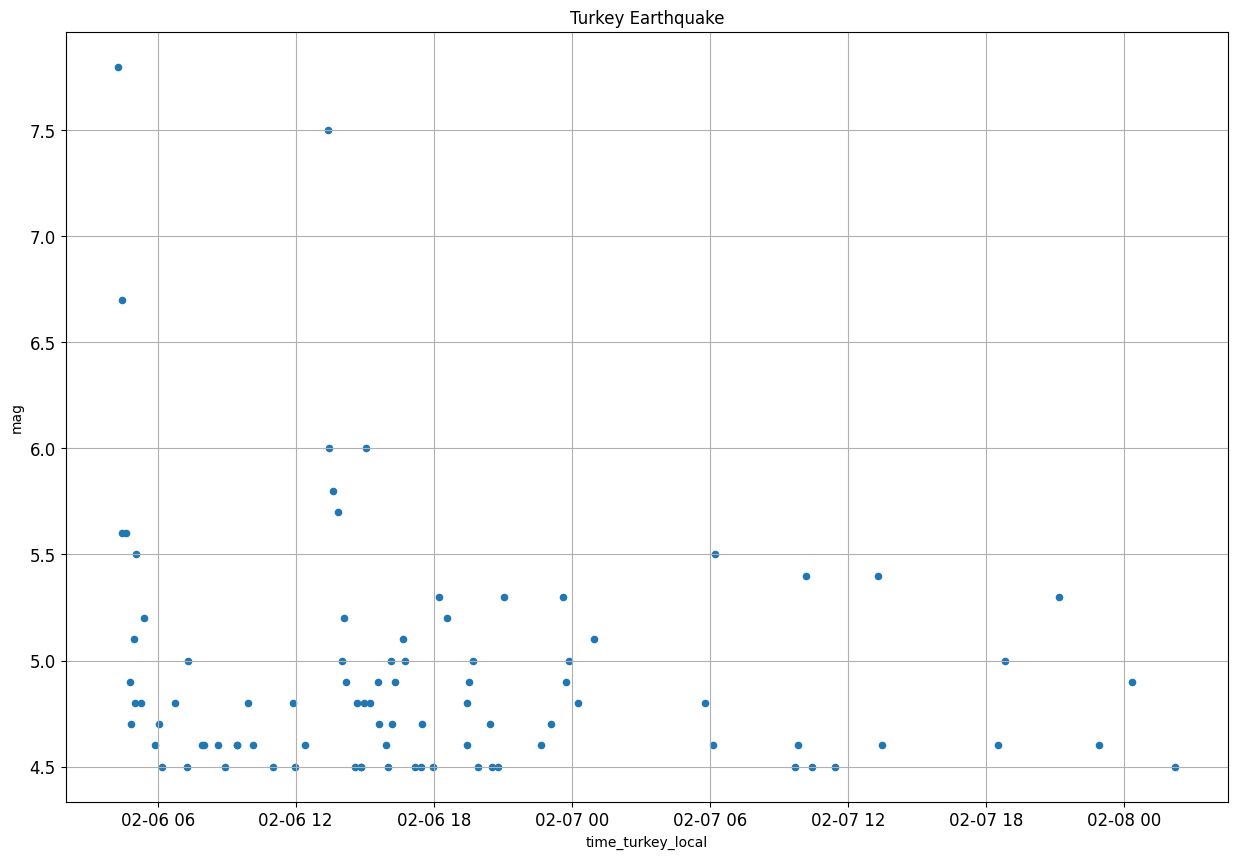

In [6]:
#plot a chart to show the time of the earthquake and the magnitude
quake_list_turkey.plot(x='time_turkey_local', y='mag', kind='scatter', title='Turkey Earthquake', figsize=(15, 10), grid=True, fontsize=12)